In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploracion de datos  

## Application train

Importamos el dataset de entrenamiento, y revisamos sus estadisticas principales rapidamente.

In [2]:
data_train = pd.read_csv('../input/application_train.csv')
print(data_train.shape)
data_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Al revisar las estadisticas que muestra la sentencia *data_train.describe()* observamos algo extraño en algunas columnas, como la columna *Days_Birth* que tiene valores negativos, y esto se debe a que las edades estan calculadas en dias y de manera relativa a la aplicación del prestamo.

In [3]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

Para arreglar esta irregularidad en los datos, sacamos el valor absoluto de los dias que nos presenta el dataset, y para una vision mas comun de la edad, lo convertimos en años dividiendo por 365.

In [4]:
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])/365

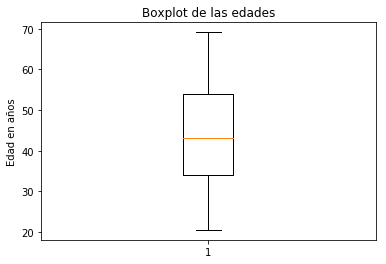

In [5]:
#revisamos con un boxplot que todo este mas o menos normal y no existan outliers exagerados
plt.boxplot(data_train['DAYS_BIRTH'])
plt.title('Boxplot de las edades')
plt.ylabel('Edad en años');

Todo parece estar bien con las edades, ahora haremos lo mismo con la columna de *DAYS_EMPLOYED* que posee la misma irregularidad

In [6]:
data_train['DAYS_EMPLOYED'] = abs(data_train['DAYS_EMPLOYED'])/365

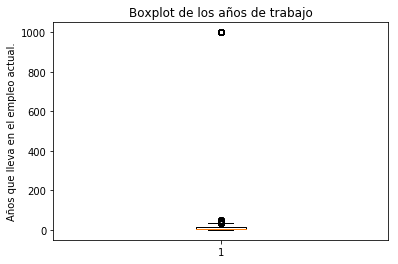

In [7]:
plt.boxplot(data_train['DAYS_EMPLOYED'])
plt.title('Boxplot de los años de trabajo')
plt.ylabel('Años que lleva en el empleo actual.');

Y se puede observar que existen outliers, y unos muy exagerados he ilogicos, tanto asi que hay algunos que han estado 1000 años en su ultimo empleo.
- Estos Outliers se eliminaran inmediatamente, y quedaran como valores *NaN* porque es ilogico e imposible que una persona haya trabajado o vivido 1000 años.
- Otra cosa importante, es que estos valores extraños, son todos iguales y equivalen a 1000.6657534246575 años de trabajo. **ENTONCES** cuando rellenemos estos valores *NaN* que crearemos, todos van a ser llenados con el mismo valor.

In [8]:
weird_data = data_train[data_train['DAYS_EMPLOYED'] >= 1000]
('Los datos raros corresponden a un %0.2f%% de todos los datos.' % (100*weird_data['DAYS_EMPLOYED'].shape[0]/data_train.shape[0]))

'Los datos raros corresponden a un 18.01% de todos los datos.'

In [9]:
data_train['DAYS_EMPLOYED'].replace(1000.6657534246575, np.nan, inplace=True)

Se siguen observando Outliers, pero mas logicos, ya que hay personas de mas de 60 años, es posible que lleven 40 años en el mismo trabajo


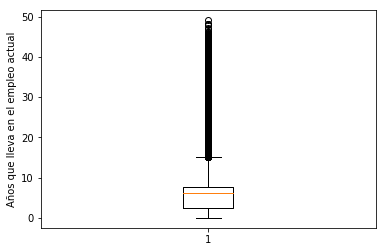

In [10]:
#Y graficamos de nuevo para ver el nuevo boxplot, llenando los Valores NaN con el promedio de la columna.
Days_Job = data_train['DAYS_EMPLOYED'].copy()
Days_Job.fillna(Days_Job.mean(), inplace=True)
print('Se siguen observando Outliers, pero mas logicos, ya que hay personas de mas de 60 años, es posible que lleven 40 años en el mismo trabajo')
plt.boxplot(Days_Job)
plt.ylabel('Años que lleva en el empleo actual');

- Revisamos las otras columnas que tienen el mismo formato de dias relativos a la aplicacion del credito, y las transformamos a valores positivos.
- Los Outliers presentados en estas columnas se pueden pasar por alto, ya que son posibles.

In [11]:
data_train['DAYS_REGISTRATION'] = abs(data_train['DAYS_REGISTRATION'])

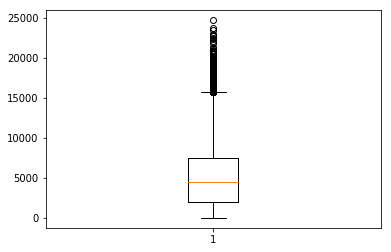

In [12]:
plt.boxplot(data_train['DAYS_REGISTRATION']);

In [13]:
data_train['DAYS_ID_PUBLISH'] = abs(data_train['DAYS_ID_PUBLISH'])

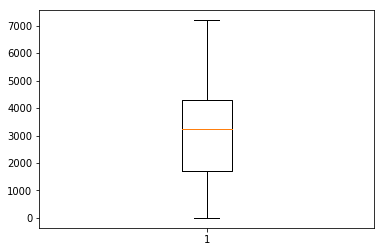

In [14]:
plt.boxplot(data_train['DAYS_ID_PUBLISH']);

Graficando se puede ver que nuestro dataset esta muy desbalanceado.

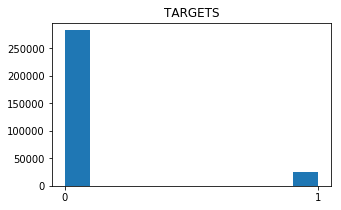

In [16]:
plt.figure(figsize=(5,3))
plt.hist(data_train['TARGET'].astype(int))
plt.title('TARGETS')
plt.xticks([0,1]);

Explicitamente se puede ver la proporcion de cada posible valor de nuestro TARGET

In [17]:
print('target 1 :', sum(data_train.TARGET==1), 'datos')
print('target 0 :', sum(data_train.TARGET==0), 'datos')
print('------------------')
print('%target 1 :', np.mean(data_train.TARGET==1))
print('%target 0 :', np.mean(data_train.TARGET==0))

target 1 : 24825 datos
target 0 : 282686 datos
------------------
%target 1 : 0.08072881945686496
%target 0 : 0.9192711805431351


Buscando valores NaN

In [18]:
print('valores NaN', data_train.isnull().sum().sum())
print('porcentaje de valores NaN en el DF:', 100*data_train.isnull().sum().sum()/(data_train.shape[0]*data_train.shape[1]))

valores NaN 9207839
porcentaje de valores NaN en el DF: 24.543541585157744


Los valores NaN se trataran justo antes de empezar a realizar las predicciones, esto con el fin de probar varias maneras de llenar los valores NaN y escoger la que mejor rendimiento presente.

______________________

Buscando caracteristicas categoricas... obtenemos 16!

In [19]:
data_train.dtypes.value_counts()

float64    67
int64      39
object     16
dtype: int64

revisando cuantos valores unicos poseen las caracteristicas categoricas

In [20]:
obj_columns = data_train.dtypes[data_train.dtypes.values == 'object'].index.tolist()

In [21]:
print(data_train[obj_columns].apply(pd.Series.nunique, axis = 0))
print('cantidad de elementos unicos en las variables categoricas', data_train[obj_columns].apply(pd.Series.nunique, axis = 0).values.sum())

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
cantidad de elementos unicos en las variables categoricas 140


Tienen muy pocos valores unicos

## Application Test

Dataset de testeo. Se le realiza el mismo analisis que al anterior.

A primera vista se ve que el conjunto de testeo es significativamente mas pequeño que el conjunto de entrenamiento.

In [22]:
data_test = pd.read_csv('../input/application_test.csv')
print(data_test.shape)
data_test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,...,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,...,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,1569.276709,11.462889,0.004529,0.392526,0.403488,0.039971,0.440337,0.369046,0.890423,0.522694,0.515804,3.278172,0.135937,0.228306,0.200673,0.267332,0.417365,0.379299,0.205142,0.181278,0.189498,0.113112,0.081536,0.049318,0.113188,0.082868,0.139164,0.100669,0.147361,0.164976,...,0.100931,0.147629,0.165241,0.082869,0.099737,0.116503,0.048148,0.072998,0.111420,3.608053,0.514413,3.580125,0.403791,878.920740,0.0,0.409698,0.010128,0.120554,0.282536,0.006405,0.283969,0.066879,0.0,0.034176,0.0,0.0,0.0,0.0,0.0,0.0,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,

**Checkeo y Correccion de irregularidades en las columnas del dataset**  
Se realiza el mismo proceso que se uso en el dataset de entrenamiento para corregir las irregularidades encontradas.

In [24]:
data_test['DAYS_BIRTH'] = abs(data_test['DAYS_BIRTH'])/365

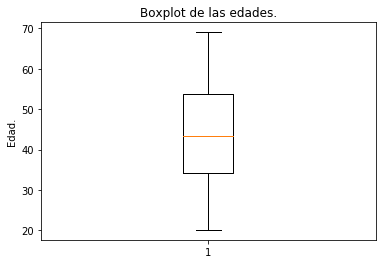

In [25]:
#Todo parece estar en orden con las edades
plt.boxplot(data_test['DAYS_BIRTH'])
plt.title('Boxplot de las edades.')
plt.ylabel('Edad.');

Para los dias de empleo que tiene en el trabajo actual

In [26]:
data_test['DAYS_EMPLOYED'] = abs(data_test['DAYS_EMPLOYED'])/365

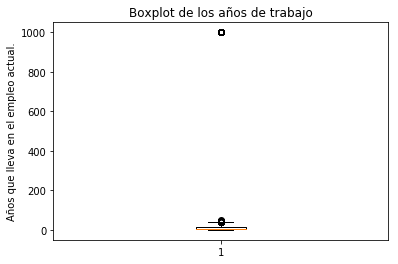

In [27]:
#Todo parece estar en orden con las edades
plt.boxplot(data_test['DAYS_EMPLOYED'])
plt.title('Boxplot de los años de trabajo')
plt.ylabel('Años que lleva en el empleo actual.');

In [28]:
data_test['DAYS_EMPLOYED'].replace(1000.6657534246575, np.nan, inplace=True)

In [29]:
print('Maximo valor: ', data_test['DAYS_EMPLOYED'].max())
print('Minimo valor', data_test['DAYS_EMPLOYED'].min())

Maximo valor:  47.843835616438355
Minimo valor 0.0027397260273972603


Para las otras dos variables del mismo formato.

In [30]:
data_test['DAYS_REGISTRATION'] = abs(data_test['DAYS_REGISTRATION'])

In [31]:
print('Maximo valor: ', data_test['DAYS_REGISTRATION'].max())
print('Minimo valor', data_test['DAYS_REGISTRATION'].min())

Maximo valor:  23722.0
Minimo valor 0.0


In [32]:
data_test['DAYS_ID_PUBLISH'] = abs(data_test['DAYS_ID_PUBLISH'])

In [33]:
print('Maximo valor: ', data_test['DAYS_ID_PUBLISH'].max())
print('Minimo valor', data_test['DAYS_ID_PUBLISH'].min())

Maximo valor:  6348
Minimo valor 0


**Reviso los valores NaN**

Se puede notar que la proporcion de valores NaN no varia mucho en comparación al dataset de entrenamiento.

In [34]:
print('valores NaN', data_test.isnull().sum().sum())
print('porcentaje de valores NaN en el DF es de %0.2f%%' %(100*data_test.isnull().sum().sum()/(data_test.shape[0]*data_test.shape[1])))

valores NaN 1413693
porcentaje de valores NaN en el DF es de 23.97%


**Buscando las columnas categoricas**  
Al tratarse de la parte de un mismo archivo, se puede ver que el dataset de testeo posee las mismas columnas categoricas que el dataset de entrenamiento

In [35]:
data_test.dtypes.value_counts()

float64    67
int64      38
object     16
dtype: int64

In [36]:
obj_columns = data_test.dtypes[data_test.dtypes.values == 'object'].index.tolist()

In [37]:
print(data_test[obj_columns].apply(pd.Series.nunique, axis = 0))
print('cantidad de elementos unicos en las variables categoricas', data_test[obj_columns].apply(pd.Series.nunique, axis = 0).values.sum())

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
cantidad de elementos unicos en las variables categoricas 137


***Aunque si se nota un leve cambio en la cantidad de valores unicos que poseen las columnas categoricas.***

# Pre-Procesado de datos

### Codificación de las caracteristicas categoricas

- Usando LabelEncoder para las caracteristicas con 2 categorias
- Usando OneHotEncoder (para crear variables Dummy) para las caracteristicas que tengan mas de 2 categorias

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label = LabelEncoder()

for i in obj_columns:
    if len(data_train[i].unique()) <= 2:
        #entreo el objeto encoder
        label.fit(data_train[i])
        #aplico la transformacion en los dos DF principales.
        data_train[i] = label.transform(data_train[i])
        data_test[i] = label.transform(data_test[i])

#Ahora codificar las que tienen mas de 2 categorias.
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [40]:
print('Nuevas dimensiones del DF:', data_train.shape)
print('Nuevas dimensiones del DF:', data_test.shape)

Nuevas dimensiones del DF: (307511, 243)
Nuevas dimensiones del DF: (48744, 239)


Por esta razon tenemos que modificar los dataset de entrenamiento y prueba, ya que deben tener la misma cantidad de columnas para que el modelo predictivo que se cree nos sirva.  

- Se penso en usar el metodo Join, pero el metodo JOIN nos retornaria un solo dataset, y nosotros necesitamos tener los dos, entonces...
- Se usara el metodo Align para "alinear" los dos archivos y que queden con un mismo numero de columnas, sin tener que necesariamente unirlos.

In [41]:
#Lo primero es salvar nuestra columna de TARGET, porque esta columna no esta en el dataset de pruebas
Targets = data_train['TARGET']
#hacemos uso del metodo align, que nos permite "recortar" los dataframes para que queden con la misma
#cantidad de columnas. (Usamos las columnas que tienen en comun los dos dataframes)
#Usamos axis = 1 para que nos realice el proceso por columnas y no por filas.
data_train, data_test = data_train.align(data_test, join='inner', axis=1)
#Ahora solo hay que agregar de nuevo la columna de los TARGETS a nuestro nuevo dataset de entrenamiento
data_train['TARGET'] = Targets

In [44]:
print('Nuevas dimensiones del DF:', data_train.shape)
print('Nuevas dimensiones del DF:', data_test.shape)

Nuevas dimensiones del DF: (307511, 240)
Nuevas dimensiones del DF: (48744, 239)


## Feature Engineering

### Buscando Correlaciones
Este paso es muy importante ya que podemos encontrar que caracteristicas afectan mas a nuestro *TARGET*

In [45]:
corrs = data_train.corr()

Nos interesa ver las correlaciones de las variables contra nuestra variable *TARGET*

In [46]:
corrs.sort_values('TARGET', inplace=True)

In [47]:
corrs = corrs['TARGET']

In [48]:
corrs.head(10)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
DAYS_EMPLOYED                          -0.074958
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
DAYS_ID_PUBLISH                        -0.051457
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
Name: TARGET, dtype: float64

In [49]:
corrs.tail(10)

REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

**LAS 10 MAS**
Se puede observar que las columnas que afectan mas de manera positiva son:
- CODE_GENDER_M                                      
- DAYS_LAST_PHONE_CHANGE                            
- NAME_INCOME_TYPE_Working                            
- REGION_RATING_CLIENT                                
- REGION_RATING_CLIENT_W_CITY 

Y las que mas afectan de manera negativa son:
- EXT_SOURCE_3                        
- EXT_SOURCE_2                         
- EXT_SOURCE_1                        
- DAYS_BIRTH                            
- DAYS_EMPLOYED                          

Obteniendo las caracteristicas mas importantes con otro metodo... Entrenando un RandomForestClassifier.

Pero primero debemos rellenar los NaN  

**Tratamiento de los valores NaN**

- Lo primero es obtener las columnas que poseen valores NaN.
- Y luego rellenar los valores NaN con alguna estrategia.

In [50]:
columns_NaN = data_train.isnull().sum()[data_train.isnull().sum().values > 0].index.tolist()

In [51]:
data_train['OWN_CAR_AGE'].fillna(0, inplace=True)
data_train.fillna(np.mean(data_train), inplace=True)

Ahora el mismo procedimiento para el dataset de test

In [52]:
columns_NaN = data_test.isnull().sum()[data_test.isnull().sum().values > 0].index.tolist()

In [53]:
data_test['OWN_CAR_AGE'].fillna(0, inplace=True)
data_test.fillna(np.mean(data_test), inplace=True)

### Creando un bosque aleatorio clasificador para obtener la importancia de las caracteristicas

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
cl = data_train.columns.values.tolist()
cl.remove('TARGET')
X = data_train.filter(cl)
y = data_train['TARGET']

In [57]:
RFC = RandomForestClassifier()
RFC.fit(X, y)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [74]:
FI = pd.DataFrame({'Column':X.columns.values.tolist(), 'Importance':RFC.feature_importances_})
FI.sort_values(by='Importance', ascending=False, inplace=True)

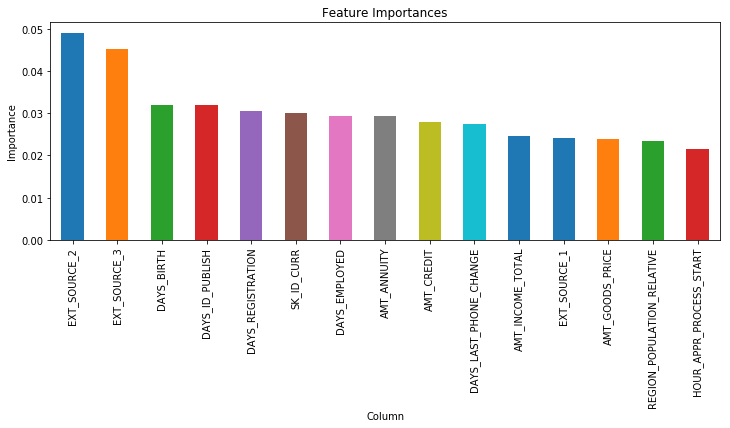

In [95]:
FI[:15].plot(x='Column', y='Importance', kind='bar', figsize=(12,4), legend=False)
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xticks(rotation=90);

Como se observo anteriormente con el coeficiente de pearson (con la funcion de pandas .corr()) los campos que mas afectan a nuestro *TARGET* son los de EXT_SORCE_#, y otros como el *INCOME_TOTAL*, *AMT_ANNUITY*, *GOODS_PRICE*, *DAYS_EMPLOYED*, entre otros como se ve en la anterior grafica.  
Y algo curioso es que la edad *DAYS_BIRTH* afecta.  

### Re-Escalado de los datos
Es necesario hacerlo para que una columna no influya mucho mas que otra por la escala en la que estan los datos.

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X_train = scaler.transform(X)
X_test = scaler.transform(data_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Hacemos unas predicciones para probar lo que hemos hecho hasta aca.

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
LR = LogisticRegression(n_jobs=-1)
LR.fit(X_train, y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
#Usamos el metodo predict_proba ya que este nos devuelve un array de n x 2, donde n son
#las observaciones, y 2 son las columnas, la primera columna para las probabilidades de 
#que salga 0 y la segunda para las probabilidades de 1. Para nuestro reto necesitamos 
#la segunda columna.
result = LR.predict_proba(X_test)[:,1]

Ahora que tenemos las probabilidades, tenemos que crear el archivo con el formato que exige la competencia de kaggle para obtener nuestro score.

In [101]:
submission = data_test[['SK_ID_CURR']]

In [102]:
submission['TARGET'] = result

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
submission.head(10)

,SK_ID_CURR,TARGET
0,100001,0.056481
1,100005,0.212261
2,100013,0.042172
3,100028,0.034225
4,100038,0.129258
5,100042,0.022847
6,100057,0.019992
7,100065,0.096406
8,100066,0.017209
9,100067,0.112297


In [104]:
submission.to_csv('submission.csv', index=False)

**Y que pasa si cambiamos el parametro de regularizacion C...**

In [105]:
LR = LogisticRegression(C=0.1, n_jobs=-1, solver='lbfgs')
LR.fit(X_train, y)
LR_2 = LR.predict_proba(X_test)[:,1]

In [106]:
Submission1_5 = data_test[['SK_ID_CURR']]
Submission1_5['TARGET'] = LR_2
Submission1_5.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.054167
1,100005,0.218365
2,100013,0.039805
3,100028,0.043995
4,100038,0.138266


In [107]:
Submission1_5.to_csv('Submission1_5.csv', index=False)

### Probando con un Arbol de clasificacion.

In [108]:
RFC = RandomForestClassifier(n_estimators=100, n_jobs=-1)
RFC.fit(X_train,y)
RF_Results = RFC.predict_proba(X_test)[:,1]

In [109]:
submission2 = data_test[['SK_ID_CURR']]
submission2['TARGET'] = RF_Results
submission2.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.12
1,100005,0.12
2,100013,0.08
3,100028,0.06
4,100038,0.14
5,100042,0.15
6,100057,0.08
7,100065,0.13
8,100066,0.04
9,100067,0.17


In [110]:
submission2.to_csv('Submission2.csv', index=False)

### Prueba con el algoritmo de GradientBoostingClassifier

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y)
GB_Results = GBC.predict_proba(X_test)[:,1]

In [ ]:
Submission3 = data_test[['SK_ID_CURR']]

In [ ]:
Submission3['TARGET'] = GB_Results

In [ ]:
Submission3.head(10)

In [ ]:
Submission3.to_csv('Submission3.csv', index=False)

## Exploracion y preprocesado de los archivos Previous y Bureau

In [112]:
Previous_data = pd.read_csv('../input/previous_application.csv')
Previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
print(Previous_data.shape)
Previous_data.describe()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**Pre-Procesado**

In [114]:
Previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [116]:
#La columna NAME_TYPE_SUITE siendo algo tan alejado del tema se considera innecesaria, 
#por esta razon se elimina.
Previous_data = Previous_data.drop('NAME_TYPE_SUITE',1)
Previous_data['PRODUCT_COMBINATION'].fillna('Cash', inplace=True)

In [117]:
Previous_data.dtypes.value_counts()

object     15
float64    15
int64       6
dtype: int64

In [118]:
label = LabelEncoder()
obj_columns = Previous_data.dtypes[Previous_data.dtypes.values == 'object'].index.tolist()
for i in obj_columns:
    if len(Previous_data[i].unique()) <= 2:
        #entreo el objeto encoder
        label.fit(Previous_data[i])
        #aplico la transformacion en los dos DF principales.
        Previous_data[i] = label.transform(Previous_data[i])

#Ahora codificar las que tienen mas de 2 categorias.
Previous_data = pd.get_dummies(Previous_data)

In [119]:
print('Nuevas dimensiones del DF: ', Previous_data.shape)

Nuevas dimensiones del DF:  (1670214, 156)


Llenado de valores NaN

In [120]:
Previous_data.fillna(np.mean(Previous_data), inplace=True)

## Bureau data

In [121]:
Bureau_data = pd.read_csv('../input/bureau.csv')
Bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [122]:
print(Bureau_data.shape)
Bureau_data.describe()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


### Pre-procesado de Bureau

In [123]:
Bureau_data.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [124]:
Bureau_data['DAYS_CREDIT_ENDDATE'] = abs(Bureau_data['DAYS_CREDIT_ENDDATE']) 
Bureau_data['DAYS_ENDDATE_FACT'] = abs(Bureau_data['DAYS_ENDDATE_FACT']) 

In [125]:
Bureau_data.dtypes.value_counts()

float64    8
int64      6
object     3
dtype: int64

In [126]:
label = LabelEncoder()
obj_columns = Bureau_data.dtypes[Bureau_data.dtypes.values == 'object'].index.tolist()
for i in obj_columns:
    if len(Bureau_data[i].unique()) <= 2:
        #entreo el objeto encoder
        label.fit(Bureau_data[i])
        #aplico la transformacion en los dos DF principales.
        Bureau_data[i] = label.transform(Bureau_data[i])

#Ahora codificar las que tienen mas de 2 categorias.
Bureau_data = pd.get_dummies(Bureau_data)

In [127]:
Bureau_data.fillna(np.mean(Bureau_data), inplace=True)

In [128]:
print('Nuevas dimensiones de Bureau:', Bureau_data.shape)

Nuevas dimensiones de Bureau: (1716428, 37)


**ANTES DE CONTINUAR CON LA UNION DE LOS DATOS**  
Los datos se identifican con la columna *SK_ID_CURR* en los DF, por lo tanto si queremos hacer una fusion de las tablas que poseemos debemos ver si un mismo cliente puede tener varios registros de prestamos en el pasado, o solo tiene uno, en caso de que tenga varios tendriamos que realizar una reduccion para tener solo 1 registro por cliente.

In [129]:
cp = Previous_data[Previous_data[['SK_ID_CURR']].duplicated(keep=False)]
print('Hay',abs(cp.index.shape[0]-Previous_data.shape[0]),'repetidos de', Previous_data.shape[0])

Hay 60458 repetidos de 1670214


In [130]:
cp = Bureau_data[Bureau_data[['SK_ID_CURR']].duplicated(keep=False)]
print('Hay',abs(cp.index.shape[0]-Bureau_data.shape[0]),'repetidos de', Bureau_data.shape[0])

Hay 41520 repetidos de 1716428


Como se puede notar, hay varios repetidor en ambos archivos, entonces tendremos que aplicar algun metodo para reducir los registros que existen por cliente a solo 1.  
- Para los datos del archivo *Previous* haremos un promedio de los registros de un mismo cliente.
- Para el Bureau

**NOTA**: el merge se realizara en el DF inicial, y no en el archivo ya re escalado.

In [131]:
#Eliminamos el identificador del prestamo previo, porque no nos sirve de nada ya que
#vamos a fusionar varios registros en uno.
Previous_data = Previous_data.drop('SK_ID_PREV', axis=1)
#Hacemos grupos con los id del prestamo actual y dejamos solo el promedio de ellos.
Previous_data = Previous_data.groupby(Previous_data['SK_ID_CURR']).mean()

Y ahora si hacemos la fusion con los datos de entrenamiento y con los de prueba.

In [132]:
print(data_train.shape, Previous_data.shape)

(307511, 240) (338857, 154)


In [154]:
Merged_data_train = pd.merge(data_train, Previous_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
Merged_data_test = pd.merge(data_test, Previous_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')

### Ahora continuamos con la tabla de Bureau

In [155]:
#Eliminamos el identificador del Bureau, porque no nos sirve de nada ya que
#vamos a fusionar varios registros en uno.
Bureau_data = Bureau_data.drop('SK_ID_BUREAU', axis=1)
#Hacemos grupos con los id del prestamo actual y dejamos solo el promedio de ellos.
Bureau_data = Bureau_data.groupby(Bureau_data['SK_ID_CURR']).mean()

KeyError: "['SK_ID_BUREAU'] not found in axis"

In [156]:
Merged_data_train = pd.merge(Merged_data_train, Bureau_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
Merged_data_test = pd.merge(Merged_data_test, Bureau_data, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')

**Se realiza la division en TRAIN y TEST el RE-Escalado antes de construir los modelos**

In [157]:
cl = Merged_data_train.columns.values.tolist()
cl.remove('TARGET')
Merged_X_train = Merged_data_train.filter(cl)
y = Merged_data_train['TARGET']

Justo antes de re-escalar nuestros DataFrames tenemos que solucionar el problema de los valores NaN, ya que hay clientes que no tenian creditos pasados, o no estaban en la lista de *bureau* entonces estos datos quedan como NaN  .
- Se usara el valor minimo para rellenar los valores NaN
- Se usara el promedio para rellenar los valores NaN

Dos estrategias y se probaran ambas para experimentar con cual tenemos mejores resultados.

In [158]:
Final1_X_train = Merged_X_train.fillna(np.min(Merged_X_train))
Final1_X_test = Merged_data_test.fillna(np.min(Merged_data_test))

Final2_X_train = Merged_X_train.fillna(np.mean(Merged_X_train))
Final2_X_test = Merged_data_test.fillna(np.mean(Merged_data_test))

In [159]:
scaler1 = MinMaxScaler(feature_range=(0,1))
Merged_X_train = scaler1.fit_transform(Merged_X_train)
scaler2 = MinMaxScaler(feature_range=(0,1))
Merged_data_test = scaler2.fit_transform(Merged_data_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Prediccion con Gradient Boosting Classifier y Logistic Regression, con los NaN Reemplazados por el minimo.

In [160]:
Merged_GBC = GradientBoostingClassifier()
Merged_GBC.fit(Final1_X_train, y)
Merged_GBC_Results = Merged_GBC.predict_proba(Final1_X_test)

In [168]:
Final_GBSubmission_min = Final1_X_test[['SK_ID_CURR']]
Final_GBSubmission_min['TARGET'] = Merged_GBC_Results[:,1]
Final_GBSubmission_min.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.044384
1,100005,0.108677
2,100013,0.024087
3,100028,0.040260
4,100038,0.119423


In [165]:
Final_GBSubmission_min.to_csv('Final_GB_Submission_min.csv', index=False)

0    100001
1    100005
2    100013
3    100028
4    100038
Name: SK_ID_CURR, dtype: object

In [175]:
Merged_LR = LogisticRegression(C=0.1, n_jobs=-1)
Merged_LR.fit(Final1_X_train, y)
Merged_LR_Results = Merged_LR.predict_proba(Final1_X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [176]:
Final_LRSubmission_min = Final1_X_test[['SK_ID_CURR']]
Final_LRSubmission_min['TARGET'] = Merged_LR_Results[:,1]
Final_LRSubmission_min.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.140845
1,100005,0.166286
2,100013,0.105827
3,100028,0.041124
4,100038,0.102009


In [177]:
Final_LRSubmission_min.to_csv('FINAL_LR_Submission_min.csv', index=False)

## Prediccion con Gradient Boosting Classifier y Logistic Regression, con los NaN Reemplazados por el promedio.

In [172]:
Merged_GBC2 = GradientBoostingClassifier()
Merged_GBC2.fit(Final2_X_train, y)
Merged_GBC2_Results = Merged_GBC2.predict_proba(Final2_X_test)

In [173]:
Final_GBSubmission_mean = Final2_X_test[['SK_ID_CURR']]
Final_GBSubmission_mean['TARGET'] = Merged_GBC2_Results[:,1]
Final_GBSubmission_mean.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.053357
1,100005,0.113130
2,100013,0.028833
3,100028,0.036868
4,100038,0.116542


In [174]:
Final_GBSubmission_mean.to_csv('Final_GB_Submission_mean.csv', index=False)

In [178]:
Merged_LR2 = LogisticRegression(C=0.1, n_jobs=-1)
Merged_LR2.fit(Final2_X_train, y)
Merged_LR2_Results = Merged_LR2.predict_proba(Final2_X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [179]:
Final_LRSubmission_mean = Final2_X_test[['SK_ID_CURR']]
Final_LRSubmission_mean['TARGET'] = Merged_LR2_Results[:,1]
Final_LRSubmission_mean.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SK_ID_CURR,TARGET
0,100001,0.095127
1,100005,0.103234
2,100013,0.083440
3,100028,0.045713
4,100038,0.058253


In [180]:
Final_LRSubmission_mean.to_csv('Final_LR_Submission_mean.csv', index=False)